# Querying CSVs and Plot Graphs with LLMs

## Dataset:

A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal.

- **sbp**		systolic blood pressure
- **tobacco**		cumulative tobacco (kg)
- **ldl**		low densiity lipoprotein cholesterol
- **adiposity**
- **famhist**		family history of heart disease (Present, Absent)
- **typea**		type-A behavior
- **obesity**
- **alcohol**		current alcohol consumption
- **age**		age at onset
- **chd**		response, coronary heart disease



### Install required libraries

In [ ]:
!pip install langchain openai langchain_experimental

### Import required libraries

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from getpass import getpass
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain_community.llms import OpenAI


### Set the OpenAI key

In [23]:
os.environ['OPENAI_API_KEY'] = getpass("OpenAI Key:")

OpenAI Key:··········


### Read the dataset

In [24]:
chd_df = pd.read_csv('/content/South African Heart Disease.csv')

### Configure the Langchain Agent


In [25]:
agent = create_pandas_dataframe_agent(OpenAI(temperature=0),
                                      chd_df,
                                      verbose=True)

#### Which model?

In [26]:
openai = OpenAI(temperature=0.0)

In [27]:
openai.model_name

'gpt-3.5-turbo-instruct'

## Getting Metadata

### How many rows and columns?

In [28]:
results = agent("how many records are there?")



> Entering new AgentExecutor chain...
Thought: I need to count the number of rows in the dataframe
Action: python_repl_ast
Action Input: len(df)150150 is the number of rows in the dataframe
Final Answer: There are 150 records in the dataframe.

> Finished chain.


In [29]:
results

{'input': 'how many records are there?',
 'output': 'There are 150 records in the dataframe.'}

#### Validate with our code

In [30]:
chd_df.shape

(150, 11)

In [31]:
agent("how many rows and how many columns are there?")



> Entering new AgentExecutor chain...
Thought: I need to find the number of rows and columns in the dataframe.
Action: python_repl_ast
Action Input: len(df)150150 is the number of rows, now I need to find the number of columns.
Action: python_repl_ast
Action Input: len(df.columns)1111 is the number of columns.
Final Answer: There are 150 rows and 11 columns in the dataframe.

> Finished chain.


{'input': 'how many rows and how many columns are there?',
 'output': 'There are 150 rows and 11 columns in the dataframe.'}

### Looking at few records

In [32]:
results = agent("sample 5 records and display")



> Entering new AgentExecutor chain...
Thought: I want to see a sample of 5 records from the dataframe
Action: python_repl_ast
Action Input: df.sample(5)     row.names  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  \
28          29  144     4.09  5.55      31.40  Present     60    29.43   
95          96  134     3.00  4.37      23.07   Absent     56    20.54   
24          25  142    18.20  4.34      24.38   Absent     61    26.19   
142        143  128     2.80  5.53      14.29   Absent     64    24.97   
121        122  120     1.40  6.25      20.47   Absent     60    25.85   

     alcohol  age  chd  
28      5.55   56    0  
95      9.65   62    0  
24      0.00   50    0  
142     0.51   38    0  
121     8.51   28    0  5 random records have been sampled
Final Answer: The sample of 5 records from the dataframe is shown above.

> Finished chain.


### Finding missing values

In [33]:
results = agent("Are there any missing values in the dataset?")



> Entering new AgentExecutor chain...
Thought: I should check if there are any null values in the dataframe.
Action: python_repl_ast
Action Input: df.isnull().values.any()FalseThere are no missing values in the dataset.
Final Answer: False

> Finished chain.


## Probability Distribution

### Finding Frequencies of Variables

In [34]:
query = 'what are the unique values in the column chd?'

In [35]:
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to access the column chd and then use a function to find the unique values.
Action: python_repl_ast
Action Input: df['chd'].unique()[1 0]1 and 0 are the only unique values in the column chd.
Final Answer: [1 0]

> Finished chain.


In [36]:
query = 'What are the frequencies of the unique values in the column chd?'
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to use the value_counts() function to get the frequencies of the unique values in the column chd.
Action: python_repl_ast
Action Input: df['chd'].value_counts()0    93
1    57
Name: chd, dtype: int64I now know the final answer
Final Answer: The frequencies of the unique values in the column chd are 93 for 0 and 57 for 1.

> Finished chain.


In [37]:
chd_df.chd.value_counts()

0    93
1    57
Name: chd, dtype: int64

In [38]:
query = """if the value in chd column is 0, then it indicate the person
is not suffering from chd. Then how many persons are suffering from chd?"""
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to only include rows where the value in the chd column is 1.
Action: python_repl_ast
Action Input: df[df['chd'] == 1]     row.names  sbp  tobacco    ldl  adiposity  famhist  typea  obesity  \
0            1  160    12.00   5.73      23.11  Present     49    25.30   
1            2  144     0.01   4.41      28.61   Absent     55    28.87   
3            4  170     7.50   6.41      38.03  Present     51    31.99   
4            5  134    13.60   3.50      27.78  Present     60    25.99   
7            8  114     4.08   4.59      14.60  Present     62    23.11   
9           10  132     0.00   5.80      30.96  Present     69    30.11   
10          11  206     6.00   2.95      32.27   Absent     72    26.81   
11          12  134    14.10   4.44      22.39  Present     65    23.09   
17          18  146    10.50   8.29      35.36  Present     78    32.73   
18          19  158     2.60   7.46      34.07  Prese

### Finding Probability Distributions

In [39]:
query = """What is the probability distribution of persons suffering from chd?"""
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to find the distribution of the 'chd' column in the dataframe.
Action: python_repl_ast
Action Input: df['chd'].value_counts()0    93
1    57
Name: chd, dtype: int64This shows the number of occurrences of each value in the 'chd' column.
Action: python_repl_ast
Action Input: df['chd'].value_counts(normalize=True)0    0.62
1    0.38
Name: chd, dtype: float64 This shows the percentage of occurrences of each value in the 'chd' column.
Final Answer: The probability distribution of persons suffering from chd is approximately 38%.

> Finished chain.


In [40]:
chd_df.chd.value_counts(normalize = True)

0    0.62
1    0.38
Name: chd, dtype: float64

In [41]:
query = """Answer the query based on the following description.
1. If the value in chd column is 0, then it indicates the person is not suffering from chd.
Then how many person are suffering from chd who did not have any family history of chd?"""
results = agent(query)



> Entering new AgentExecutor chain...
Thought: We need to filter the dataframe to only include rows where chd is 1 and famhist is Absent, and then count the number of rows.
Action: python_repl_ast
Action Input: df[(df['chd'] == 1) & (df['famhist'] == 'Absent')].count()row.names    28
sbp          28
tobacco      28
ldl          28
adiposity    28
famhist      28
typea        28
obesity      28
alcohol      28
age          28
chd          28
dtype: int6428 people are suffering from chd who did not have any family history of chd.
Final Answer: 28

> Finished chain.


In [42]:
pd.crosstab(chd_df.chd, chd_df.famhist)

famhist,Absent,Present
chd,,
0,62,31
1,28,29


### Conditional Probability

In [43]:
query = """What is the probability that a person with no family history
of chd will suffer from chd?"""
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to only include rows where famhist is "Absent" and then calculate the percentage of those rows where chd is 1.
Action: python_repl_ast
Action Input: df[df["famhist"] == "Absent"]["chd"].mean()0.3111111111111111I now know the final answer
Final Answer: 0.3111111111111111

> Finished chain.


In [44]:
pd.crosstab(chd_df.chd, chd_df.famhist, normalize = 'columns')

famhist,Absent,Present
chd,,
0,0.688889,0.516667
1,0.311111,0.483333


## Univariate Analysis

Univariate analysis in exploratory data analysis focuses on analyzing a single variable at a time. It involves examining the distribution, central tendency, dispersion, and other statistical properties of a single variable without considering its relationship with other variables. The main objective of univariate analysis is to understand the characteristics and patterns of individual variables in isolation.

Common techniques used in univariate analysis include:

- **Descriptive statistics**: Descriptive statistics provide measures that summarize and describe the main properties of a variable. These measures include measures of central tendency (mean, median, mode) that describe the typical or central value of the variable, and measures of dispersion (variance, standard deviation, range) that describe the spread or variability of the variable.

- **Histograms**: is a graphical representations of the distribution of a variable. They display the frequencies or counts of different values or intervals of the variable on a bar chart. Histograms help visualize the shape, skewness, and presence of any outliers in the variable's distribution.

- **Box plots**: it provide a visual summary of the distribution of a variable. They display the minimum, maximum, median, and quartiles of the variable's values. Box plots help identify the range of values, skewness, outliers, and potential differences between groups or categories.

- **Bar Plot**: is a graphical representation of categorical data using rectangular bars. It displays the frequencies or proportions of different categories or groups and provides a visual comparison between them. Bar plots are commonly used to present discrete data and show the distribution or relationship between variables.


### Creating a bar plot



> Entering new AgentExecutor chain...
Thought: I need to use the matplotlib library to create a bar plot.
Action: python_repl_ast
Action Input: import matplotlib.pyplot as pltI need to specify the column 'chd' as the data to plot.
Action: python_repl_ast
Action Input: plt.bar(df['chd'].unique(), df['chd'].value_counts())<BarContainer object of 2 artists>I need to add labels and a title to the plot.
Action: python_repl_ast
Action Input: plt.xlabel('CHD Status')
plt.ylabel('Number of Persons')
plt.title('Number of Persons Suffering from CHD')
plt.show()

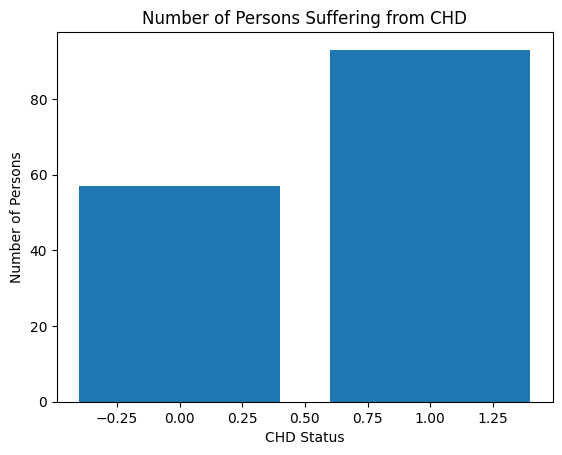

I now know the final answer.
Final Answer: A bar plot depicting the number of persons suffering from chd has been created.

> Finished chain.


In [45]:
query = """Draw a bar plot to depict number of persons suffering from chd?"""
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to group the data by famhist and chd, then plot a bar chart
Action: python_repl_ast
Action Input: df.groupby(['famhist', 'chd']).size().unstack().plot(kind='bar', stacked=True)Axes(0.125,0.11;0.775x0.77)I now know the final answer
Final Answer: The final answer is a bar plot showing the number of persons with and without family history of chd, stacked by chd status.

> Finished chain.


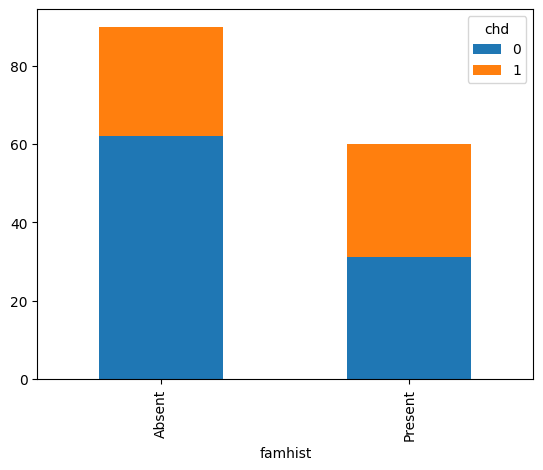

In [46]:
query = """Draw a bar plot to depict number of persons having family
history of chd stacked by chd"""
results = agent(query)

### Finding outliers

In [48]:
query = """Are there any outliers in terms of age of those suffering from chd?"""
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I should first filter the dataframe to only include rows where chd is equal to 1.
Action: python_repl_ast
Action Input: df[df['chd'] == 1]     row.names  sbp  tobacco    ldl  adiposity  famhist  typea  obesity  \
0            1  160    12.00   5.73      23.11  Present     49    25.30   
1            2  144     0.01   4.41      28.61   Absent     55    28.87   
3            4  170     7.50   6.41      38.03  Present     51    31.99   
4            5  134    13.60   3.50      27.78  Present     60    25.99   
7            8  114     4.08   4.59      14.60  Present     62    23.11   
9           10  132     0.00   5.80      30.96  Present     69    30.11   
10          11  206     6.00   2.95      32.27   Absent     72    26.81   
11          12  134    14.10   4.44      22.39  Present     65    23.09   
17          18  146    10.50   8.29      35.36  Present     78    32.73   
18          19  158     2.60   7.46      34.07  Present     61 

### Creating a box plot



> Entering new AgentExecutor chain...
Thought: I should use the boxplot function to visualize the distribution of age for those with chd.
Action: python_repl_ast
Action Input: df.boxplot(column='age', by='chd')Axes(0.1,0.15;0.8x0.75)I can see that there are a few outliers in the age distribution for those with chd.
Action: python_repl_ast
Action Input: df[df['chd']==1]['age'].describe()count    57.000000
mean     49.877193
std      11.204384
min      20.000000
25%      42.000000
50%      53.000000
75%      59.000000
max      64.000000
Name: age, dtype: float64 I now know the final answer.
Final Answer: Yes, there are outliers in the age distribution for those with chd.

> Finished chain.


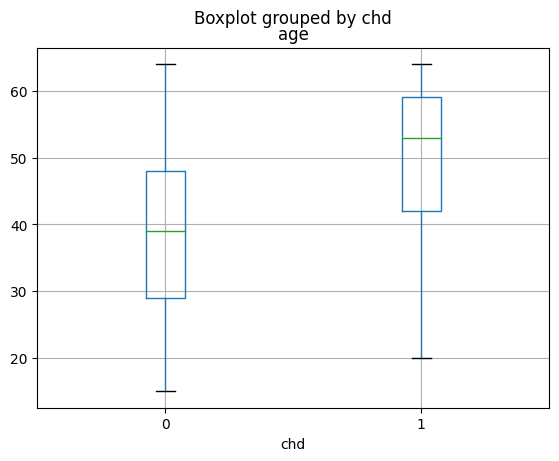

In [49]:
query = """Are there any outliers in terms of age of those suffering from chd.
Find out using box."""
results = agent(query)

### Comparing Probability Distributions



> Entering new AgentExecutor chain...
Thought: I need to use the seaborn library to create a kde plot and specify the x and y variables.
Action: python_repl_ast
Action Input: import seaborn as snsI need to filter the dataframe to only include rows where chd is equal to 1 (suffering from chd) and where chd is equal to 0 (not suffering from chd).
Action: python_repl_ast
Action Input: df_chd = df[df['chd'] == 1]I need to create a kde plot for the tobacco column in the df_chd dataframe.
Action: python_repl_ast
Action Input: sns.kdeplot(df_chd['tobacco'])Axes(0.125,0.11;0.775x0.77)I need to add the kde plot for the tobacco column in the df_not_chd dataframe to the same plot.
Action: python_repl_ast
Action Input: df_not_chd = df[df['chd'] == 0]I need to create a kde plot for the tobacco column in the df_not_chd dataframe and specify the color as red.
Action: python_repl_ast
Action Input: sns.kdeplot(df_not_chd['tobacco'], color='red')Axes(0.125,0.11;0.775x0.77)I need to add a legend to the

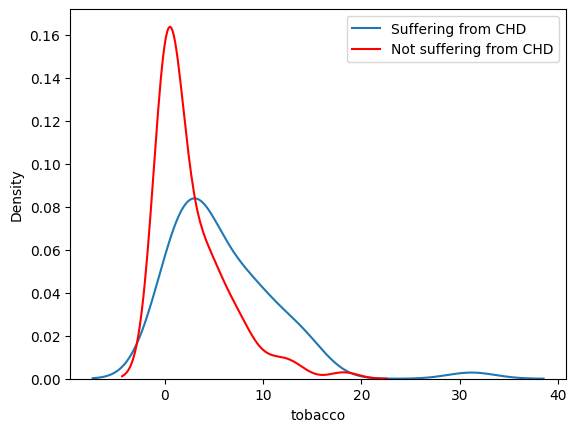

In [50]:
query = """Compare the probability distribution of tobacco consumption between
those who suffer from chd and not suffer from chd using kde plot"""
results = agent(query)

### Doing a hypothesis test

A hypothesis test, also known as a statistical test, is a method used in statistical inference to make decisions or draw conclusions about a population based on sample data. It involves the formulation of two competing hypotheses, the null hypothesis (H₀) and the alternative hypothesis (H₁), and uses statistical techniques to assess the evidence against the null hypothesis.

The null hypothesis (H₀) represents a statement of no effect, no difference, or no relationship in the population. The alternative hypothesis (H₁) represents the opposite of the null hypothesis, suggesting the presence of an effect, difference, or relationship in the population.

$H_{0}$: Tobacco consumption of those who suffer from chd is same as those who do not suffer from chd

$H_{A}$: Tobacco consumption of those who suffer from chd is not same as those who do not suffer from chd

In [51]:
query = """Do t-test for the following hypothesis.
Null Hypothesis: Tobacco consumption of those who suffer from chd is same as those who do not suffer from chd
Alternate Hypothesis: Tobacco consumption of those who suffer from chd is not same as those who do not suffer from chd
"""
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to perform a t-test to compare the means of two groups.
Action: python_repl_ast
Action Input: df.groupby('chd')['tobacco'].mean()chd
0    2.678280
1    5.938421
Name: tobacco, dtype: float64I now have the means for each group, but I need to perform a t-test to compare them.
Action: python_repl_ast
Action Input: from scipy.stats import ttest_indI now have the ttest_ind function available to use.
Action: python_repl_ast
Action Input: ttest_ind(df[df['chd']==0]['tobacco'], df[df['chd']==1]['tobacco'])TtestResult(statistic=-4.399509463166725, pvalue=2.0634369061235632e-05, df=148.0)I now have the t-test result, but I need to interpret it.
Action: python_repl_ast
Action Input: print("The p-value is", ttest_ind(df[df['chd']==0]['tobacco'], df[df['chd']==1]['tobacco'])[1])The p-value is 2.0634369061235632e-05
I now know the final answer.
Final Answer: Based on the t-test results, we can reject the null hypothesis and conclude that there 

## Bivariate Analysis

Bivariate analysis in exploratory data analysis refers to the examination of the relationship between two variables. It involves studying the patterns, trends, and associations between two variables to understand how changes in one variable affect the other.

The main objective of bivariate analysis is to determine whether there is a significant relationship between the two variables and to explore the nature and strength of that relationship. This analysis helps in understanding how the variables behave in relation to each other and provides insights into their potential influence on each other's values.

Common techniques used in bivariate analysis include:

- Scatter plots
- Correlation analysis

### Creating Scatter Plot

A scatter plot is a graphical representation of data points in a Cartesian coordinate system. It helps visualize the relationship between two variables by plotting them as points on the graph. The pattern or shape of the scatter plot provides information about the nature of the relationship, such as positive or negative correlation, linear or nonlinear relationship, etc.


- To depict the correlation between two numerical variables.



> Entering new AgentExecutor chain...
Thought: I need to use the pandas dataframe plot function to create a scatter plot with adiposity on the x-axis and ldl on the y-axis.
Action: python_repl_ast
Action Input: df.plot.scatter(x='adiposity', y='ldl')Axes(0.125,0.11;0.775x0.77)I now know the final answer
Final Answer: A scatter plot showing the correlation between adiposity and ldl.

> Finished chain.


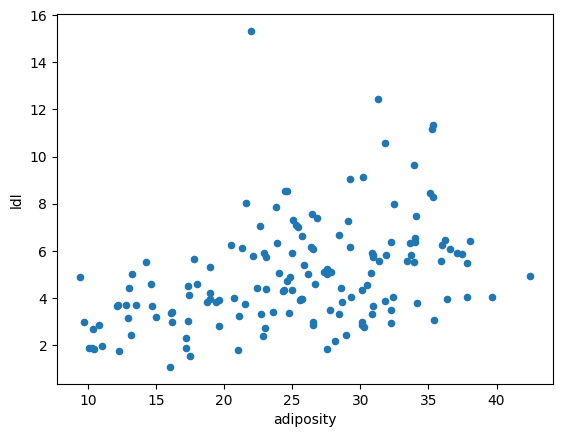

In [53]:
query = """Show the correlation between adiposity and ldl using a plot"""
results = agent(query)

### Finding Correlation

Correlation analysis measures the strength and direction of the linear relationship between two variables. It produces a correlation coefficient that quantifies the relationship. The coefficient ranges from -1 to +1, where -1 indicates a perfect negative correlation, +1 indicates a perfect positive correlation, and 0 indicates no correlation.




> Entering new AgentExecutor chain...
Thought: I need to select the columns I want to use and then use the corr() function to calculate the correlation matrix.
Action: python_repl_ast
Action Input: df[['age', 'adiposity', 'ldl', 'tobacco', 'alcohol']].corr()                age  adiposity       ldl   tobacco   alcohol
age        1.000000   0.657743  0.347205  0.447407  0.196341
adiposity  0.657743   1.000000  0.413788  0.205814  0.076083
ldl        0.347205   0.413788  1.000000  0.113458 -0.086748
tobacco    0.447407   0.205814  0.113458  1.000000  0.241790
alcohol    0.196341   0.076083 -0.086748  0.241790  1.000000 Now I need to create a heatmap using seaborn.
Action: python_repl_ast
Action Input: import seaborn as sns; sns.heatmap(df[['age', 'adiposity', 'ldl', 'tobacco', 'alcohol']].corr())Axes(0.125,0.11;0.62x0.77) I now know the final answer
Final Answer: The correlation between variables age, adiposity, ldl, tobacco and alcohol is shown in the heatmap above.

> Finished chain.


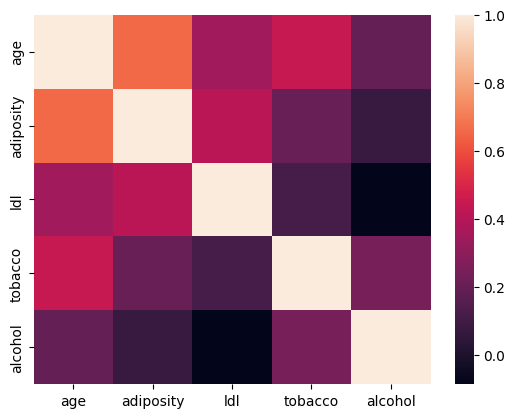

In [57]:
query = """What is the correlation between variables age, adiposity, ldl, tobacco and alcohol.
Show using a heatmap."""
results = agent(query)